In [7]:
# This code is the analysis on the top 5 countries with hight suicide rates
# It further attempts to explore their differences and similarity of suicide rates in different age groups
# barplot from Seaborn library is used for visualisation 

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
# Getting Data of crude suicide rate
suicide_rate_data_filepath = os.path.join("..","..","processed_data", "crude_suicide_rates.csv")
suicide_rate_dataframe = pd.read_csv(suicide_rate_data_filepath, index_col=0)
#print(human_resource_dataframe.head())

In [19]:
# Calculate the total suicide rate of all different ages
suicide_rate_dataframe['all_age'] = suicide_rate_dataframe['80_above']+ suicide_rate_dataframe['70to79'] + suicide_rate_dataframe['60to69']+ suicide_rate_dataframe['50to59']
+ suicide_rate_dataframe['40to49']+ suicide_rate_dataframe['30to39']+ suicide_rate_dataframe['20to29'] + suicide_rate_dataframe['10to19']
#print(suicide_rate_dataframe.head())

# Do Melting - Tranform/Combine the multiple  column names of different age groups into one column "Age"
suicide_rate_pivot_longer_df = pd.melt(suicide_rate_dataframe, id_vars=['Country', 'Sex'], value_vars=['80_above','70to79', '40to49', '30to39', '20to29', '10to19'], var_name='Age',value_name='Suicide_rate')
print(suicide_rate_pivot_longer_df)

suicide_rate_pivot_longer_df = suicide_rate_pivot_longer_df[(suicide_rate_pivot_longer_df['Sex'] == 'Both sexes') & (suicide_rate_pivot_longer_df['Age'] == 'all_age' )].nlargest(5, 'Suicide_rate')
print(suicide_rate_pivot_longer_df.head())

          Country         Sex       Age  Suicide_rate
0     Afghanistan  Both sexes  80_above          42.0
1     Afghanistan        Male  80_above          70.4
2     Afghanistan      Female  80_above          20.1
3         Albania  Both sexes  80_above          16.3
4         Albania        Male  80_above          23.2
...           ...         ...       ...           ...
3289       Zambia        Male    10to19           3.9
3290       Zambia      Female    10to19           1.6
3291     Zimbabwe  Both sexes    10to19           4.6
3292     Zimbabwe        Male    10to19           6.4
3293     Zimbabwe      Female    10to19           2.7

[3294 rows x 4 columns]
Empty DataFrame
Columns: [Country, Sex, Age, Suicide_rate]
Index: []


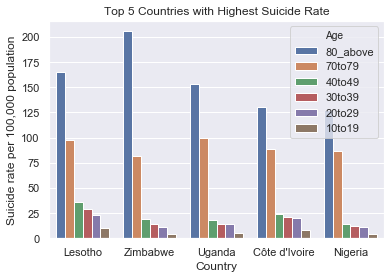

In [20]:
# Plotting the result
sns.set(color_codes=True)
plot_top5_country = sns.barplot(x='Country', y='Suicide_rate', hue='Age', data = top_5_suicide_rate_pivot_longer_df)
plt.title("Top 5 Countries with Highest Suicide Rate")
plt.ylabel("Suicide rate per 100,000 population")
plt.show()